# Les Objectifs de Développement Durable 

### Yahia Chammami 

- The Sustainable Development Goals comprise a global agenda to end poverty, protect the planet, and ensure all people enjoy peace and prosperity Adopted by all United Nations Member States in 2015, the 17 Sustainable Development Goals or SDGs or Global Goals as they are sometimes called have 169 targets that countries are attempting to reach by 2030 at the latest.

- The objective of this project is to diagnostically analyze some of this SDG indicators and  determine   Tunisia Situation toward 2030 .

- The Data we will be using is from the website of DataBank ,composed of 2 data One contains values of indicators in 2021 and the other contains the evolution of indicators during 2000-2022.

## Importing Required Libraries :

In [58]:
# Importing Required Libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 

In [59]:
# Loading And Reading Dataset :
SDGs =pd.read_excel("SDGs _ Data 2022.xlsx",sheet_name='Data2021')
SDGs.head()

,id,Country,indexreg,pop_2021,sdg1_wpc,sdg1_320pov,sdg1_oecdpov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,...,sdg16_rsf,sdg16_justice,sdg16_prison,sdg17_govex,sdg17_oda,sdg17_govrev,sdg17_cohaven,sdg17_secrecy,sdg17_sprofits,sdg17_statperf
0,AFG,Afghanistan,E. Europe & C. Asia,39835428.0,NaN,NaN,NaN,25.60,38.20,5.1,...,40.19,0.450,NaN,4.298,NaN,13.039,0.000,NaN,NaN,49.756
1,ALB,Albania,E. Europe & C. Asia,2872934.0,0.05,5.84,NaN,3.90,11.30,1.6,...,30.59,0.557,NaN,6.771,NaN,25.144,0.000,NaN,NaN,75.383
2,DZA,Algeria,MENA,44616626.0,0.33,2.42,NaN,2.50,9.80,2.7,...,47.26,0.581,NaN,10.159,NaN,NaN,0.000,NaN,NaN,55.149
3,AND,Andorra,E. Europe & C. Asia,77354.0,NaN,NaN,NaN,1.17,2.58,0.7,...,23.32,NaN,NaN,7.814,NaN,NaN,69.049,NaN,NaN,NaN
4,AGO,Angola,Sub-Saharan Africa,33933611.0,53.83,75.69,NaN,17.30,37.60,4.9,...,34.06,0.500,NaN,2.866,NaN,20.261,0.000,NaN,NaN,54.946


## Data Exploration  :

In [60]:
# Checking the Missing Values :
df = SDGs.copy()
missing_values_count = df.isnull().sum()
missing_values_count [4:65]

sdg1_wpc          32
sdg1_320pov       32
sdg1_oecdpov     156
sdg2_undernsh     23
sdg2_stunting      7
                ... 
sdg8_unemp        15
sdg8_rights       56
sdg8_impacc       17
sdg8_empop       155
sdg8_yneet       156
Length: 61, dtype: int64

In [61]:
# Checking the Percentage of total Missing Values :
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

26.47083402975096


In [62]:
# Checking the Percentage of total Missing Values per column :
missing_values_percent = (df.isna().sum() / len(df)) * 100
missing_values_percent[4:65]

sdg1_wpc         16.580311
sdg1_320pov      16.580311
sdg1_oecdpov     80.829016
sdg2_undernsh    11.917098
sdg2_stunting     3.626943
                   ...    
sdg8_unemp        7.772021
sdg8_rights      29.015544
sdg8_impacc       8.808290
sdg8_empop       80.310881
sdg8_yneet       80.829016
Length: 61, dtype: float64

In [63]:
# List of columns to drop (proportion of missing values > 50%) :
columns_to_drop = missing_values_percent[missing_values_percent > 50].index.tolist()

In [64]:
# Removing the columns from DataFrame :
df.drop(columns=columns_to_drop, inplace=True)

In [65]:
# Checking DataFrame after deleting the columns_to_drop :
print("\n DataFrame after deleting the columns_to_drop :")
df.head()


 DataFrame after deleting the columns_to_drop :


,id,Country,indexreg,pop_2021,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg16_u5reg,sdg16_cpi,sdg16_clabor,sdg16_weaponsexp,sdg16_rsf,sdg16_justice,sdg17_govex,sdg17_govrev,sdg17_cohaven,sdg17_statperf
0,AFG,Afghanistan,E. Europe & C. Asia,39835428.0,NaN,NaN,25.60,38.20,5.1,5.5,...,42.3,16.0,21.390,0.0,40.19,0.450,4.298,13.039,0.000,49.756
1,ALB,Albania,E. Europe & C. Asia,2872934.0,0.05,5.84,3.90,11.30,1.6,21.7,...,98.4,35.0,3.300,0.0,30.59,0.557,6.771,25.144,0.000,75.383
2,DZA,Algeria,MENA,44616626.0,0.33,2.42,2.50,9.80,2.7,27.4,...,99.6,33.0,4.260,0.0,47.26,0.581,10.159,NaN,0.000,55.149
3,AND,Andorra,E. Europe & C. Asia,77354.0,NaN,NaN,1.17,2.58,0.7,25.6,...,100.0,NaN,NaN,0.0,23.32,NaN,7.814,NaN,69.049,NaN
4,AGO,Angola,Sub-Saharan Africa,33933611.0,53.83,75.69,17.30,37.60,4.9,8.2,...,25.0,29.0,18.724,0.0,34.06,0.500,2.866,20.261,0.000,54.946


In [66]:
# Preparing Data to Fill with KNNImputer :
data =df.drop(['id', 'Country', 'indexreg'], axis=1)

In [67]:
# Imputing the missing values using Neighbors Values :
imputer = KNNImputer(n_neighbors=15)
data_imputed = imputer.fit_transform(data)

In [68]:
# Checking DataFrame after Using KNNImputer :
df_imp = pd.DataFrame(data_imputed, columns=data.columns)
df_imp = pd.concat([df[['id', 'Country', 'indexreg']],df_imp], axis = 1 )
print("Ensemble de données imputé :")
df_imp.head()

Ensemble de données imputé :


,id,Country,indexreg,pop_2021,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_stunting,sdg2_wasting,sdg2_obesity,...,sdg16_u5reg,sdg16_cpi,sdg16_clabor,sdg16_weaponsexp,sdg16_rsf,sdg16_justice,sdg17_govex,sdg17_govrev,sdg17_cohaven,sdg17_statperf
0,AFG,Afghanistan,E. Europe & C. Asia,39835428.0,11.788000,22.385333,25.60,38.20,5.1,5.5,...,42.3,16.0,21.390000,0.0,40.19,0.450000,4.298,13.039000,0.000,49.756000
1,ALB,Albania,E. Europe & C. Asia,2872934.0,0.050000,5.840000,3.90,11.30,1.6,21.7,...,98.4,35.0,3.300000,0.0,30.59,0.557000,6.771,25.144000,0.000,75.383000
2,DZA,Algeria,MENA,44616626.0,0.330000,2.420000,2.50,9.80,2.7,27.4,...,99.6,33.0,4.260000,0.0,47.26,0.581000,10.159,20.935733,0.000,55.149000
3,AND,Andorra,E. Europe & C. Asia,77354.0,7.234667,17.237333,1.17,2.58,0.7,25.6,...,100.0,55.8,10.468867,0.0,23.32,0.646067,7.814,36.039000,69.049,47.942267
4,AGO,Angola,Sub-Saharan Africa,33933611.0,53.830000,75.690000,17.30,37.60,4.9,8.2,...,25.0,29.0,18.724000,0.0,34.06,0.500000,2.866,20.261000,0.000,54.946000


### Statistical analysis :

In [69]:
# Basic Operations :
df_imp.shape

(193, 97)

In [70]:
# Description of data :
df_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
pop_2021,193.0,4.056973e+07,1.492608e+08,10873.000,2078723.000,9.043072e+06,2.967492e+07,1.444216e+09
sdg1_wpc,193.0,1.199890e+01,1.852418e+01,0.000,0.260,3.340000e+00,1.634000e+01,8.453000e+01
sdg1_320pov,193.0,2.247857e+01,2.611721e+01,0.000,0.720,1.420000e+01,3.570000e+01,9.553000e+01
sdg2_undernsh,193.0,9.489606e+00,1.072290e+01,1.170,2.500,5.500000e+00,1.190000e+01,5.950000e+01
sdg2_stunting,193.0,1.632017e+01,1.347610e+01,1.200,3.400,1.220000e+01,2.640000e+01,5.400000e+01
...,...,...,...,...,...,...,...,...
sdg16_justice,193.0,5.777865e-01,9.805918e-02,0.337,0.504,5.934667e-01,6.460667e-01,7.990000e-01
sdg17_govex,193.0,7.966898e+00,3.746605e+00,1.789,5.308,7.588267e+00,1.004800e+01,2.296200e+01
sdg17_govrev,193.0,2.483893e+01,1.069908e+01,0.000,19.209,2.399420e+01,2.911300e+01,1.186080e+02
sdg17_cohaven,193.0,1.612938e+01,2.807790e+01,0.000,0.000,0.000000e+00,3.905700e+01,1.000000e+02


#### Feature Information :

- pop_2021 : 2021 Population

- sdg3_lifee : Life expectancy at birth The average number of years that a newborn could expect to live.

- sdg6_freshwat : water stress tracks the level of pressure that human activities exert over natural freshwater resources.

- sdg2_obesity : The percentage of the adult population that has a body mass index (BMI) of 30kg/m² or higher.

- sdg17_statperf : The Statistical Performance Index evaluate the performance of national statistical systems.

In [71]:
# Analysis: Region - Population : 
Population = df_imp.groupby(['indexreg'])['pop_2021'].sum()

Population.sort_values( ascending=False)

indexreg
East & South Asia      3.985959e+09
OECD                   1.374975e+09
Sub-Saharan Africa     1.166573e+09
MENA                   4.566892e+08
LAC                    4.492997e+08
E. Europe & C. Asia    3.847773e+08
Oceania                1.168550e+07
Name: pop_2021, dtype: float64

In [72]:
Population.sum()

7829958614.0

Text(0.5, 1.0, 'Population Analysis (%)')

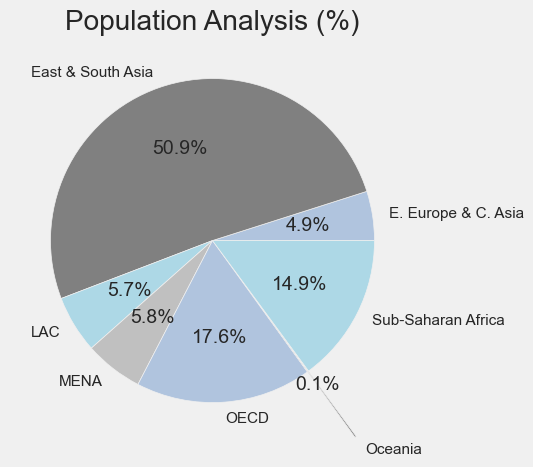

In [73]:
my_colors = ['lightsteelblue','gray','lightblue','silver']
explode = (0,0,0,0,0,0.5, 0)
plt.pie( Population.values,explode=explode,labels= Population.index , colors=my_colors, autopct='%1.1f%%')
plt.title("Population Analysis (%)")

In [74]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        

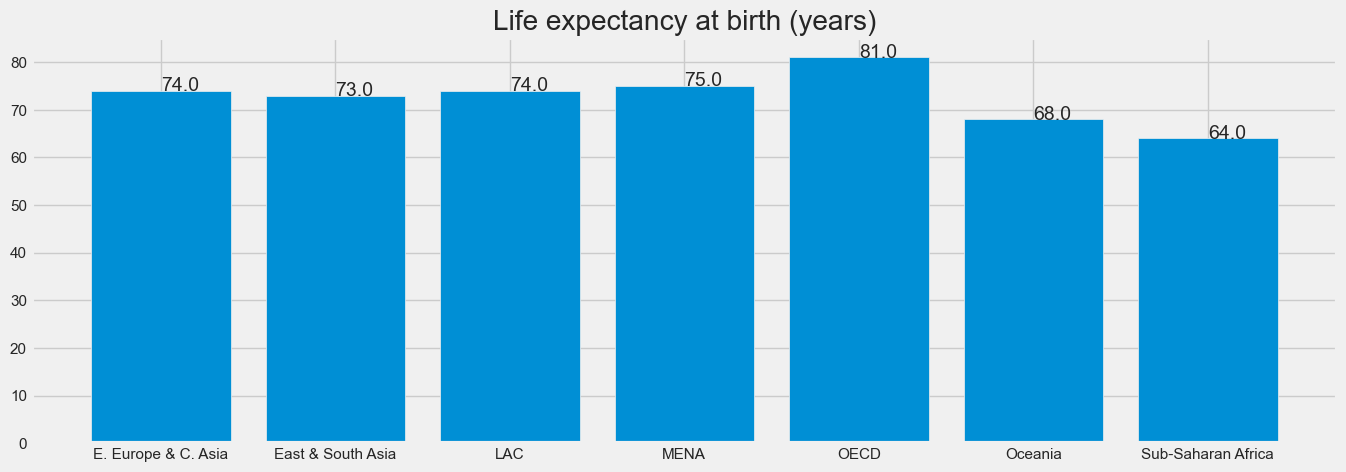

In [75]:
# Analysis: Region - Life expectancy :

Life_expectancy = df_imp.groupby(['indexreg'])['sdg3_lifee'].mean().round()
 
plt.figure(figsize=(15,5))
plt.bar(Life_expectancy.index,Life_expectancy.values)
addlabels(Life_expectancy.index,Life_expectancy.values)
plt.title("Life expectancy at birth (years)")
plt.show()

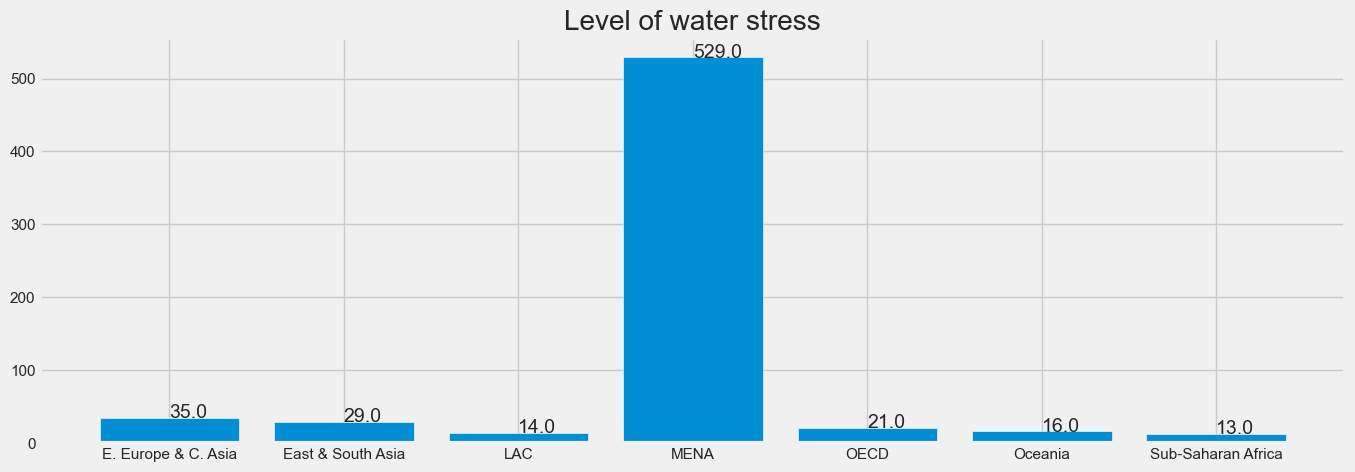

In [76]:
# Analysis:Region - Level of water stress :
Fresh_Water = df_imp.groupby(['indexreg'])['sdg6_freshwat'].mean()
 
plt.figure(figsize=(15,5))
plt.bar(Fresh_Water.index,Fresh_Water.values.round())
addlabels(Fresh_Water.index,Fresh_Water.values.round())
plt.title("Level of water stress")
plt.show()

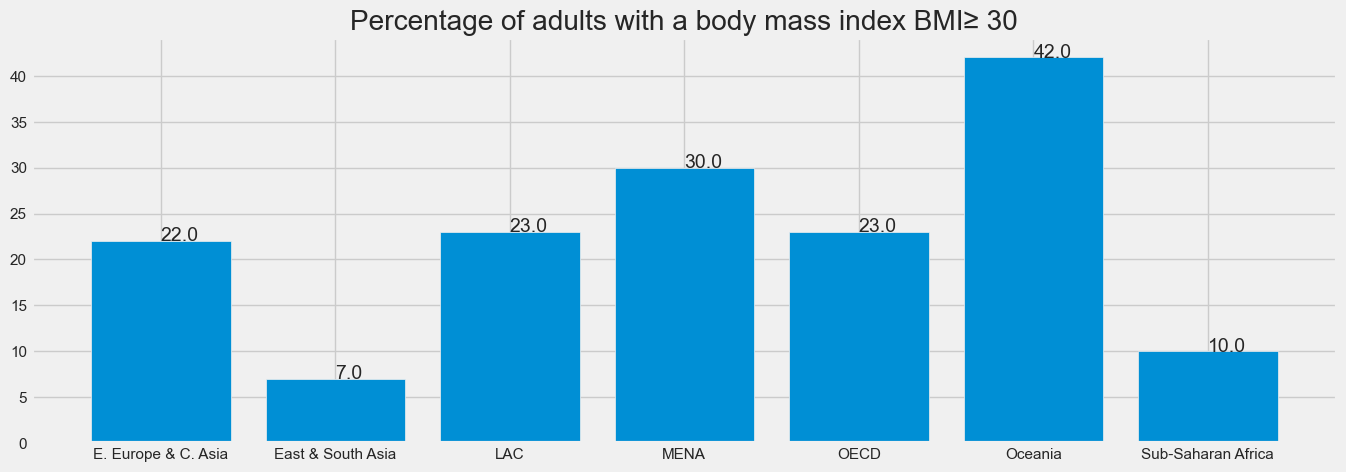

In [77]:
# Analysis: Region - Prevalence of obesity :
Obesity = df_imp.groupby(['indexreg'])['sdg2_obesity'].mean().round()

plt.figure(figsize=(15,5))
plt.bar(Obesity.index,Obesity.values.round())
addlabels(Obesity.index,Obesity.values.round())
plt.title("Percentage of adults with a body mass index BMI≥ 30")
plt.show()



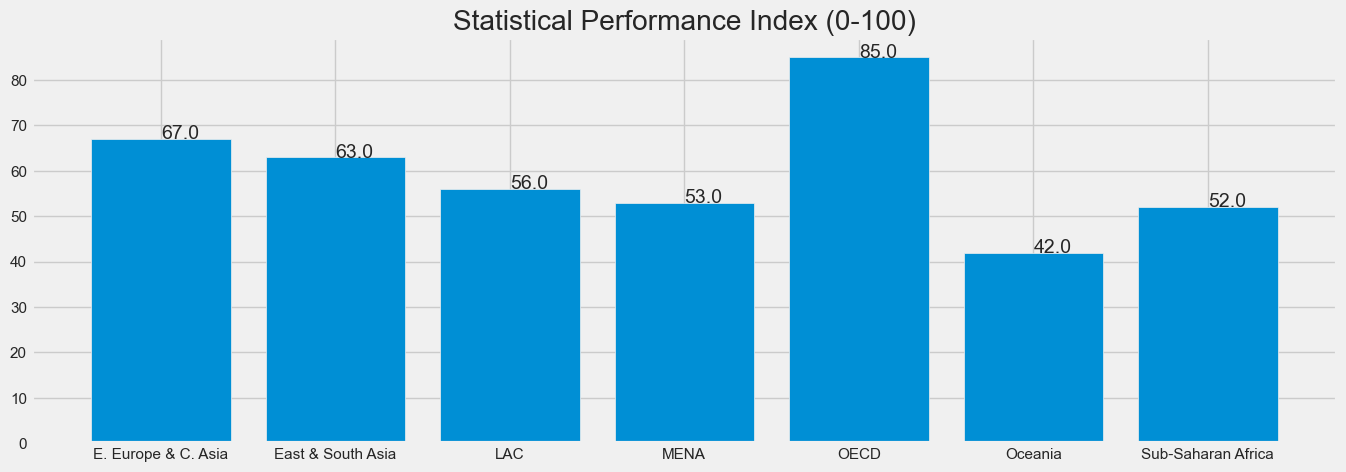

In [78]:
# Analysis: Region - Statistical Performance Index :
Performance = df_imp.groupby(['indexreg'])['sdg17_statperf'].mean().round()

plt.figure(figsize=(15,5))
plt.bar(Performance.index,Performance.values.round())
addlabels(Performance.index,Performance.values.round())
plt.title("Statistical Performance Index (0-100)")
plt.show()

## Classification Using K_means :

### Feature Information :

- sdg1_wpc : Estimated percentage of the population that is living under the poverty threshold of US$ 1.90 a day.

- sdg1_320pov : Estimated percentage of the population that is living under the poverty threshold of US$ 3.20 a day.

- sdg3_matmort : The estimated number of women aged of 15-49, who die from pregnancy-related causes while pregnant per 100,000 live births.

- sdg3_neonat : The number of newborn infants (neonates) who die before reaching 28 days of age, per 1,000 live births.

- sdg3_u5mort : The probability that a newborn baby will die before reaching age five, if subject to age-specific mortality rates of the specified year, per 1,000 live births.

- sdg11_pipedwat : The percentage of the urban population with access to improved drinking water piped on premises.

- sdg6_water : The percentage of the population using at least a basic drinking water service, such as drinking water from an improved source.

- sdg9_lpi : Survey-based average assessment of the quality of transport related infrastructure, e.g. ports, roads, railroads and information technology, on a scale from 1 (worst) to 5 (best).

- sdg11_transport : The percentage of the surveyed population that responded "satisfied" to the question "In the city or area where you live, are you satisfied or dissatisfied with the public transportation systems?".


### Poverty Classification :

In [79]:
# Poverty headcount ratio at $1.90/day(%) - Poverty headcount ratio at 3.20/day(%) :
x = "sdg1_wpc"
y = "sdg1_320pov"

X = df_imp[[x, y]].values
scaler = MinMaxScaler()
X= pd.DataFrame(scaler.fit_transform(X))
kmeans = KMeans(n_clusters = 4).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y,"class"])
Poverty_Class = pd.concat([df_imp[['Country']].reset_index(),cluster_df], axis = 1 )
Poverty_Class.head()

,index,Country,sdg1_wpc,sdg1_320pov,class
0,0,Afghanistan,0.139453,0.234328,0.0
1,1,Albania,0.000592,0.061133,3.0
2,2,Algeria,0.003904,0.025332,3.0
3,3,Andorra,0.085587,0.180439,0.0
4,4,Angola,0.636815,0.792317,2.0


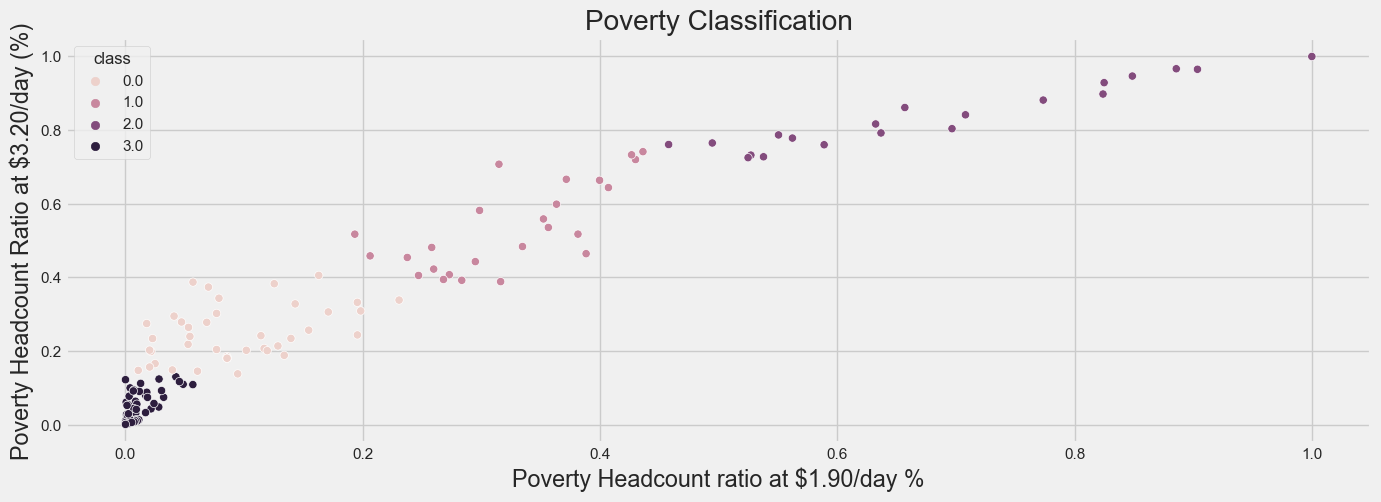

In [80]:
C2=sns.scatterplot(x=x, y=y, hue='class',data=cluster_df)
C2.set(xlabel = "Poverty Headcount ratio at $1.90/day %",ylabel ="Poverty Headcount Ratio at $3.20/day (%)",  title ='Poverty Classification')
sns.set(rc={'figure.figsize':(15,5)})

### Mortality Classification :

In [81]:
# sdg3_matmort - sdg3_neonat - sdg3_u5mort :
x = "sdg3_matmort"
y = "sdg3_neonat"
z = "sdg3_u5mort"
X = df_imp[[x,z,y]].values
X= pd.DataFrame(scaler.fit_transform(X))
kmeans = KMeans(n_clusters = 4).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y,z, "class"])
dgf = pd.concat([df_imp[['Country']].reset_index(),cluster_df], axis = 1 )
dgf.head()

,index,Country,sdg3_matmort,sdg3_neonat,sdg3_u5mort,class
0,0,Afghanistan,0.554007,0.498227,0.790805,1.0
1,1,Albania,0.011324,0.070922,0.160920,2.0
2,2,Algeria,0.095819,0.185284,0.356322,0.0
3,3,Andorra,0.051626,0.006206,0.011494,2.0
4,4,Angola,0.208188,0.617908,0.609195,3.0


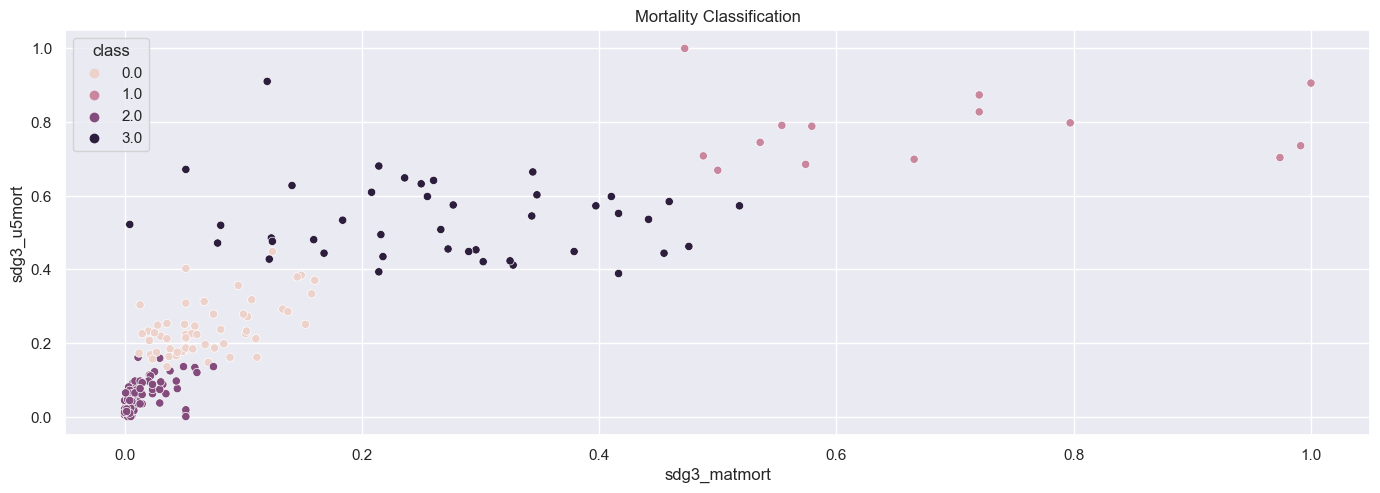

In [82]:
C3=sns.scatterplot(x=x, y=z, hue='class',data=cluster_df)
C3.set(title ='Mortality Classification')
sns.set(rc={'figure.figsize':(15,5)})


### Water Accessibility Classification :

In [83]:
# Access to improved water source piped % of urban_population - Population using at least basic drinking water_services :
x = "sdg11_pipedwat"
y = "sdg6_water"

X = df_imp[[x,y]].values
X= pd.DataFrame(scaler.fit_transform(X))
kmeans = KMeans(n_clusters = 4).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y,"class"])
dsf = pd.concat([df_imp[['Country']].reset_index(),cluster_df], axis = 1 )
dsf.head()

,index,Country,sdg11_pipedwat,sdg6_water,class
0,0,Afghanistan,0.365661,0.603347,2.0
1,1,Albania,0.822488,0.921462,0.0
2,2,Algeria,0.739297,0.911414,3.0
3,3,Andorra,1.000000,1.000000,0.0
4,4,Angola,0.557934,0.317940,1.0


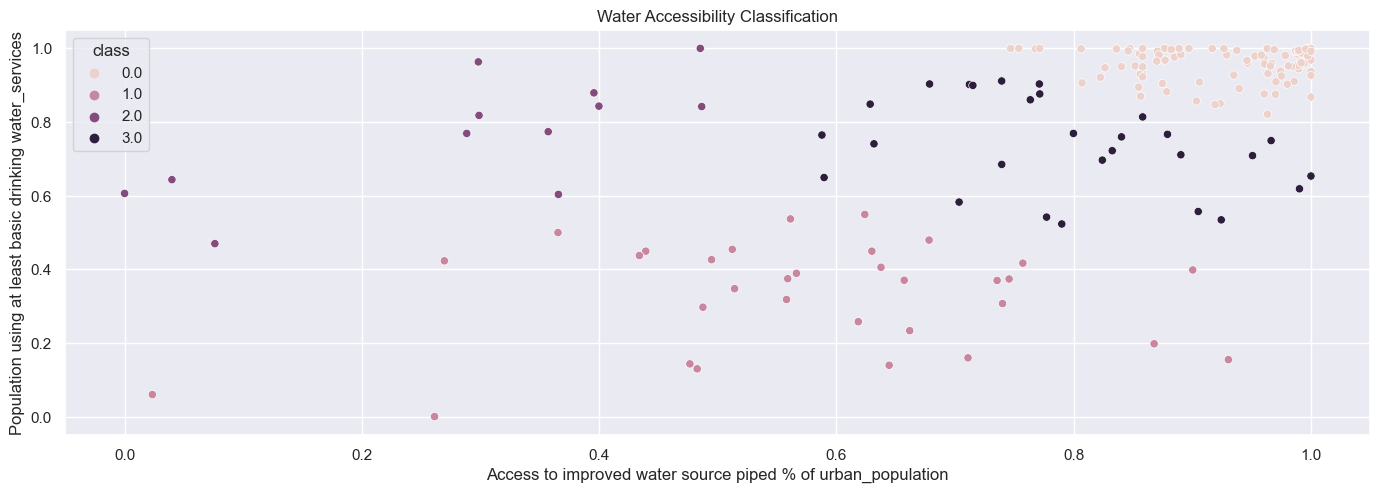

In [84]:
C4=sns.scatterplot(x=x, y=y, hue='class',data=cluster_df)
C4.set(xlabel = "Access to improved water source piped % of urban_population",ylabel ="Population using at least basic drinking water_services",  title ='Water Accessibility Classification')
sns.set(rc={'figure.figsize':(15,5)})

### Transport infrastructure Classification :

In [85]:
# Transport infrastructure Classification : Logistics Performance Index - Satisfaction with public transport (%) :
x = "sdg9_lpi"
y = "sdg11_transport"

X = df_imp[[x,y]].values
X= pd.DataFrame(scaler.fit_transform(X))
kmeans = KMeans(n_clusters = 4).fit(X)
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y,"class"])
dsf = pd.concat([df_imp[['Country']].reset_index(),cluster_df], axis = 1 )
dsf.head()

,index,Country,sdg9_lpi,sdg11_transport,class
0,0,Afghanistan,0.089070,0.305882,1.0
1,1,Albania,0.261888,0.470588,1.0
2,2,Algeria,0.306955,0.458824,1.0
3,3,Andorra,0.364561,0.631373,2.0
4,4,Angola,0.106813,0.282353,1.0


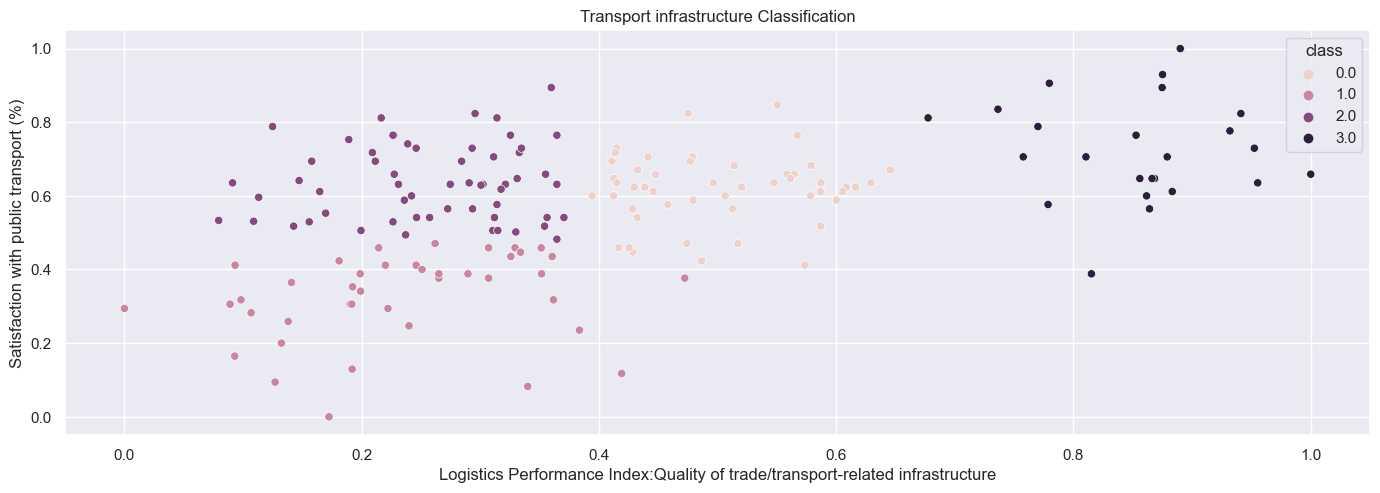

In [86]:
C5=sns.scatterplot(x=x, y=y, hue='class',data=cluster_df)
C5.set(xlabel = "Logistics Performance Index:Quality of trade/transport-related infrastructure",ylabel ="Satisfaction with public transport (%)",  title ='Transport infrastructure Classification')
sns.set(rc={'figure.figsize':(15,5)})

## Principal Component Analysis PCA :

In [87]:
# Preparind Data for PCA :
df_imp.index=df_imp["Country"]

df=df_imp.drop(["id","indexreg","Country","pop_2021"],axis=1)
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
pca=PCA(n_components=4)
pca.fit(scaled_data)


PCA(n_components=4)

In [88]:
# eigenvalues (Proportion of Variance:variance explained by each PC) : 
pca.explained_variance_ratio_

array([0.34466139, 0.06354866, 0.05704957, 0.03991663])

In [89]:
# Cumulative proportion of variance :
np.cumsum(pca.explained_variance_ratio_)

array([0.34466139, 0.40821005, 0.46525962, 0.50517624])

In [90]:
# Checking variables Contribution :
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4
variable,,,,
sdg1_wpc,0.130118,0.122175,0.111917,0.060045
sdg1_320pov,0.146618,0.093714,0.098690,0.028654
sdg2_undernsh,0.124253,0.049581,0.021574,0.030570
sdg2_stunting,0.148547,0.019593,0.001404,-0.043585
sdg2_wasting,0.106489,-0.034489,-0.015548,-0.186855
...,...,...,...,...
sdg16_justice,-0.111397,0.021707,0.130742,0.034709
sdg17_govex,-0.098379,0.017211,0.074974,0.161873
sdg17_govrev,-0.044035,-0.119439,0.181556,0.079678


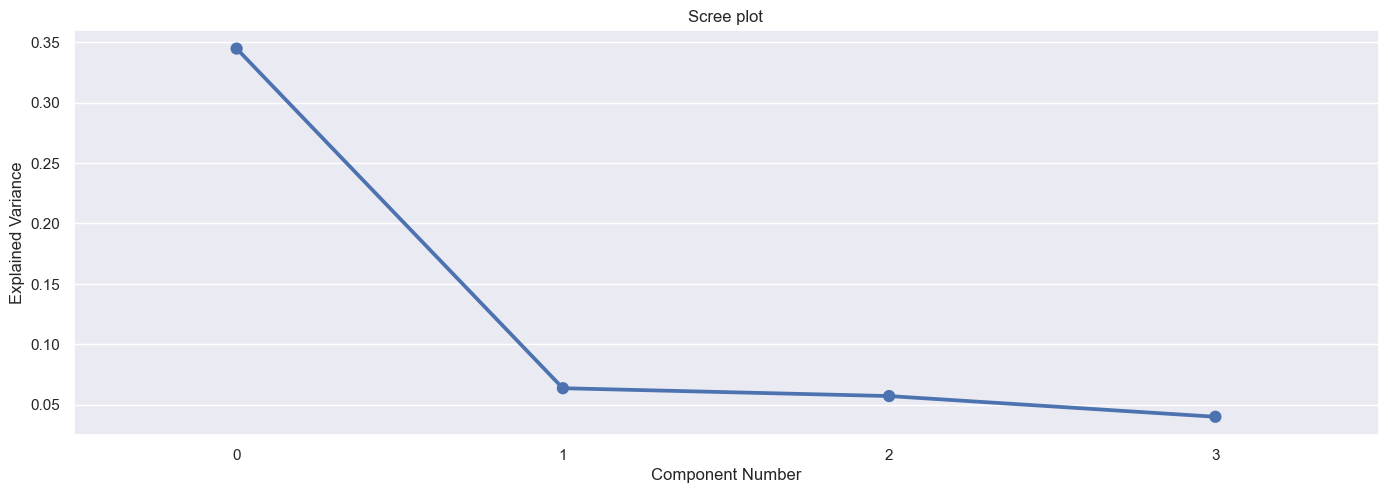

In [91]:
# Plotting a scree plot :
ind = np.arange(0, 4)
(fig, ax) = plt.subplots(figsize=(15, 5))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

### variables factor map :

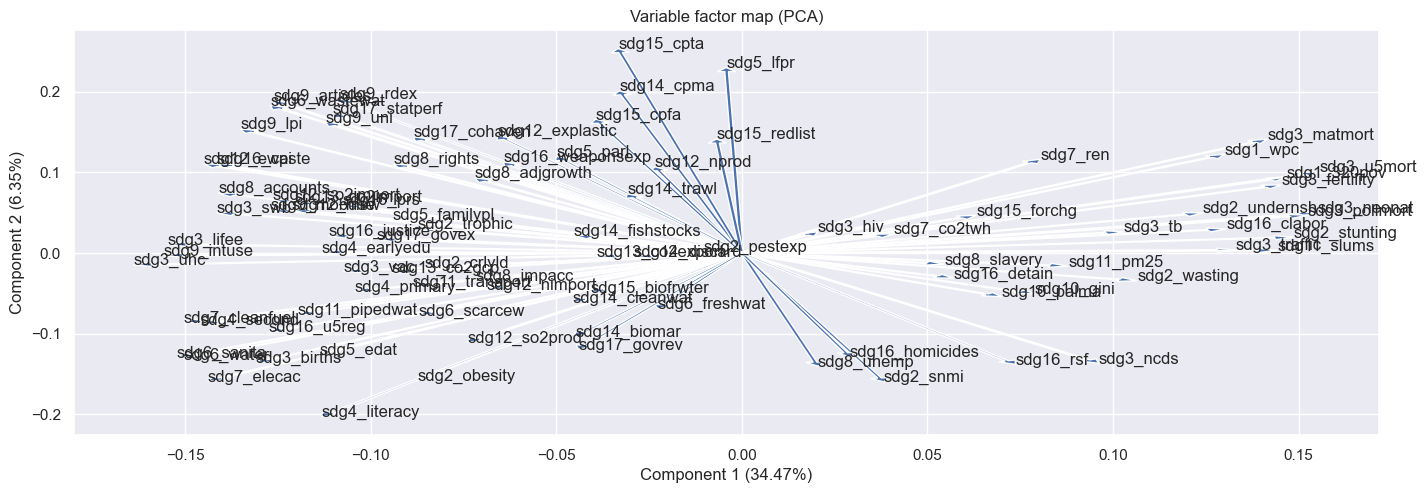

In [92]:
# Plotting a variable factor map for the first two dimensions :
add_string=""
for i in range(len(pca.components_[0])):
    xi=pca.components_[0][i]
    yi=pca.components_[1][i]
    plt.arrow(0,0, 
              dx=xi, dy=yi, 
              head_width=0.005, head_length=0.005, 
             length_includes_head=True)
    add_string=f" ({round(xi,2)} {round(yi,2)})"
    plt.text(pca.components_[0, i], pca.components_[1, i] , s= df.columns.values[i] ) 
             
plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
plt.title('Variable factor map (PCA)')
plt.show()          

### individus factor map :

In [93]:
x_pca=pca.transform(scaled_data)
scaled_data.shape 

(193, 93)

In [94]:
x_pca.shape

(193, 4)

In [95]:
# Plotting a individus factor map for the first two dimensions :
fig = px.scatter(x_pca, x=0, y=1, color=SDGs["Country"], title="Principal Component Analysis PCA")
fig.update_layout( xaxis_title="First principle component", yaxis_title="Second principle component")
fig.show()

## Time Series Data TUNISIA 2000-2030 :

### Data Exploration  :

In [96]:
# Loading And Reading Times Series Dataset : 
dft =pd.read_excel("SDGs _ Data 2022.xlsx",sheet_name='Data _ Time Series')
dft.head()

,id,Country,Year,Population,indexreg,sdg1_wpc,sdg1_320pov,sdg1_oecdpov,sdg2_undernsh,sdg2_stuntihme,...,sdg16_prs,sdg16_cpi,sdg16_rsf,sdg16_justice,sdg16_prison,sdg17_govex,sdg17_oda,sdg17_govrev,sdg17_sprofits,sdg17_statperf
0,AFG,Afghanistan,2000,20779957.0,E. Europe & C. Asia,NaN,NaN,NaN,NaN,53.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2001,21606992.0,E. Europe & C. Asia,NaN,NaN,NaN,47.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,2002,22600774.0,E. Europe & C. Asia,NaN,NaN,NaN,45.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,2003,23680871.0,E. Europe & C. Asia,NaN,NaN,NaN,40.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,2004,24726689.0,E. Europe & C. Asia,NaN,NaN,NaN,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Selecting And Reading Times Series Dataset Tunisia : 
id=dft["id"]
id =list(set(id))
Tunisia=dft[(dft["id"].str.contains("TUN"))]
Tunisia.head()

,id,Country,Year,Population,indexreg,sdg1_wpc,sdg1_320pov,sdg1_oecdpov,sdg2_undernsh,sdg2_stuntihme,...,sdg16_prs,sdg16_cpi,sdg16_rsf,sdg16_justice,sdg16_prison,sdg17_govex,sdg17_oda,sdg17_govrev,sdg17_sprofits,sdg17_statperf
4301,TUN,Tunisia,2000,9708347.0,MENA,NaN,NaN,NaN,NaN,16.468,...,NaN,NaN,NaN,NaN,NaN,8.861,NaN,26.476,NaN,NaN
4302,TUN,Tunisia,2001,9793915.0,MENA,NaN,NaN,NaN,4.4,NaN,...,NaN,NaN,NaN,NaN,NaN,8.863,NaN,26.662,NaN,NaN
4303,TUN,Tunisia,2002,9871261.0,MENA,NaN,NaN,NaN,4.4,NaN,...,NaN,NaN,NaN,NaN,NaN,8.570,NaN,27.181,NaN,NaN
4304,TUN,Tunisia,2003,9945282.0,MENA,NaN,NaN,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,9.626,NaN,26.789,NaN,NaN
4305,TUN,Tunisia,2004,10022278.0,MENA,NaN,NaN,NaN,4.4,NaN,...,NaN,NaN,NaN,NaN,NaN,9.509,NaN,26.508,NaN,NaN


In [98]:
# Checking the Percentage of total Missing Values :
missing_values_count_tn = Tunisia.isnull().sum()
total_missing = missing_values_count_tn.sum()
total_cells = np.product(Tunisia.shape)

percent_missing_tn = (total_missing/total_cells) * 100
print(percent_missing)

26.47083402975096


In [99]:
# Checking the Percentage of total Missing Values per column :
missing_values_percent = (Tunisia.isna().sum() / len(Tunisia)) * 100
missing_values_percent

id                  0.000000
Country             0.000000
Year                0.000000
Population          0.000000
indexreg            0.000000
                     ...    
sdg17_govex        13.043478
sdg17_oda         100.000000
sdg17_govrev       43.478261
sdg17_sprofits    100.000000
sdg17_statperf     82.608696
Length: 104, dtype: float64

In [100]:
# List of columns to drop (proportion of missing values > 50%) :
columns_to_drop = missing_values_percent[missing_values_percent > 50].index.tolist()
Tunisia.drop(columns=columns_to_drop, inplace=True)

# Checking DataFrame after deleting the columns_to_drop :
print("\nDataFrame after deleting the columns_to_drop :")
Tunisia.head()


DataFrame after deleting the columns_to_drop :


,id,Country,Year,Population,indexreg,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_obesity,sdg2_trophic,...,sdg13_co2gcp,sdg14_cpma,sdg14_fishstocks,sdg14_trawl,sdg14_discard,sdg15_cpta,sdg15_cpfa,sdg15_redlist,sdg17_govex,sdg17_govrev
4301,TUN,Tunisia,2000,9708347.0,MENA,NaN,NaN,NaN,18.2,2.215,...,2.026,7.318,14.19,23.536,10.417,12.994,15.643,0.971,8.861,26.476
4302,TUN,Tunisia,2001,9793915.0,MENA,NaN,NaN,4.4,18.7,2.224,...,2.098,10.296,15.64,22.112,10.129,14.280,15.643,0.971,8.863,26.662
4303,TUN,Tunisia,2002,9871261.0,MENA,NaN,NaN,4.4,19.2,2.221,...,2.083,10.296,18.69,22.743,10.417,14.280,15.643,0.971,8.570,27.181
4304,TUN,Tunisia,2003,9945282.0,MENA,NaN,NaN,4.5,19.7,2.213,...,2.104,10.296,19.75,23.631,11.636,14.280,15.643,0.970,9.626,26.789
4305,TUN,Tunisia,2004,10022278.0,MENA,NaN,NaN,4.4,20.2,2.205,...,2.188,10.296,19.35,22.033,9.841,14.280,15.643,0.971,9.509,26.508


In [101]:
# Preparing Data to Fill with KNNImputer :
datatn =Tunisia.drop(['id','Year','Population', 'Country', 'indexreg'], axis=1)

# Imputing the missing values using Neighbors Values :
imputer = KNNImputer(n_neighbors=15)
datatn_imputed = imputer.fit_transform(datatn)

# Checking DataFrame after Using KNNImputer :
TN = pd.DataFrame(datatn_imputed, columns=datatn.columns)

imp = pd.concat([Tunisia[['id','Year','Population', 'Country', 'indexreg']].reset_index(),TN], axis = 1 )
imp.head()

,index,id,Year,Population,Country,indexreg,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_obesity,...,sdg13_co2gcp,sdg14_cpma,sdg14_fishstocks,sdg14_trawl,sdg14_discard,sdg15_cpta,sdg15_cpfa,sdg15_redlist,sdg17_govex,sdg17_govrev
0,4301,TUN,2000,9708347.0,Tunisia,MENA,0.512308,4.606154,3.706667,18.2,...,2.026,7.318,14.19,23.536,10.417,12.994,15.643,0.971,8.861,26.476
1,4302,TUN,2001,9793915.0,Tunisia,MENA,0.512308,4.606154,4.400000,18.7,...,2.098,10.296,15.64,22.112,10.129,14.280,15.643,0.971,8.863,26.662
2,4303,TUN,2002,9871261.0,Tunisia,MENA,0.512308,4.606154,4.400000,19.2,...,2.083,10.296,18.69,22.743,10.417,14.280,15.643,0.971,8.570,27.181
3,4304,TUN,2003,9945282.0,Tunisia,MENA,0.512308,4.606154,4.500000,19.7,...,2.104,10.296,19.75,23.631,11.636,14.280,15.643,0.970,9.626,26.789
4,4305,TUN,2004,10022278.0,Tunisia,MENA,0.512308,4.606154,4.400000,20.2,...,2.188,10.296,19.35,22.033,9.841,14.280,15.643,0.971,9.509,26.508


### Statistical Analysis :

In [102]:
# Checking the basic Statistics for numerical columns :
imp.describe()

,index,Year,Population,sdg1_wpc,sdg1_320pov,sdg2_undernsh,sdg2_obesity,sdg2_trophic,sdg2_crlyld,sdg2_snmi,...,sdg13_co2gcp,sdg14_cpma,sdg14_fishstocks,sdg14_trawl,sdg14_discard,sdg15_cpta,sdg15_cpfa,sdg15_redlist,sdg17_govex,sdg17_govrev
count,23.00000,23.00000,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,4312.00000,2011.00000,1.078750e+07,0.512308,4.606154,3.478261,22.480290,2.213391,1.463148,0.987371,...,2.352716,25.616954,19.470754,20.232168,9.634330,27.321487,29.098968,0.971319,9.986643,27.669385
std,6.78233,6.78233,7.354435e+05,0.350638,2.137704,0.695141,2.351291,0.005110,0.229867,0.009851,...,0.178453,12.563919,1.827096,1.885964,0.678241,10.828291,12.188620,0.000631,0.855606,1.157621
min,4301.00000,2000.00000,9.708347e+06,0.170000,2.170000,2.500000,18.200000,2.205000,0.985000,0.967000,...,2.026000,7.318000,14.190000,16.317000,8.620000,12.994000,15.643000,0.970000,8.570000,26.153000
25%,4306.50000,2005.50000,1.015399e+07,0.225000,3.075000,2.950000,21.000000,2.210000,1.308500,0.983700,...,2.209500,10.296000,19.044667,18.944500,9.139500,14.280000,15.643000,0.971000,9.307000,26.882500
50%,4312.00000,2011.00000,1.074187e+07,0.512308,4.606154,3.440000,22.900000,2.212200,1.467000,0.987000,...,2.362333,22.560000,19.670000,19.929000,9.646000,25.287000,22.054000,0.971000,9.946067,27.669385
75%,4317.50000,2016.50000,1.136869e+07,0.512308,4.606154,4.150000,23.700000,2.216000,1.648500,0.994000,...,2.530000,39.576000,20.185000,21.497000,10.045500,39.500000,43.396000,0.972000,10.889000,27.669385
max,4323.00000,2022.00000,1.204666e+07,1.540000,10.760000,4.500000,26.900000,2.224000,1.878000,1.005000,...,2.618000,39.576000,22.340000,23.631000,11.636000,39.500000,43.396000,0.972000,11.301000,31.161000


#### Feature Information :

- Population : Population in Tunisia
    
- sdg11_transport : Tunisian Satisfaction with public transport %
    
- sdg8_unemp : Tunisian Unemployment rate % 

- sdg17_govex : Tunisian Government spending on health and education 
    

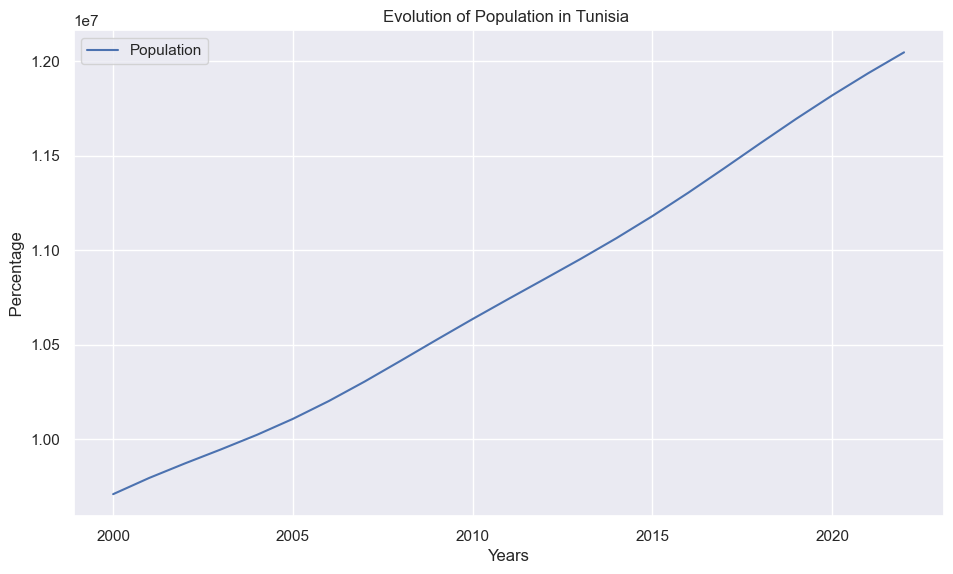

In [103]:
# Analysis : Evolution Of the Tunisian Populaion during 2000-2022 :
indicators= imp[['Population']]
values = []
years = np.arange(2000, 2023, 1)
for year in years:
    year_data = imp[imp['Year'] == year]
    values.append([year_data[indicator].iloc[0] for indicator in indicators])

# Visualize the trends of the SDG indicators over time
fig, ax = plt.subplots(figsize=(10, 6))
for i, indicator in enumerate(indicators):
    ax.plot(years, [v[i] for v in values], label=indicator)
ax.set_xlabel('Years')
ax.set_ylabel(' Percentage ')
ax.set_title('Evolution of Population in Tunisia ')
ax.legend()
plt.show()

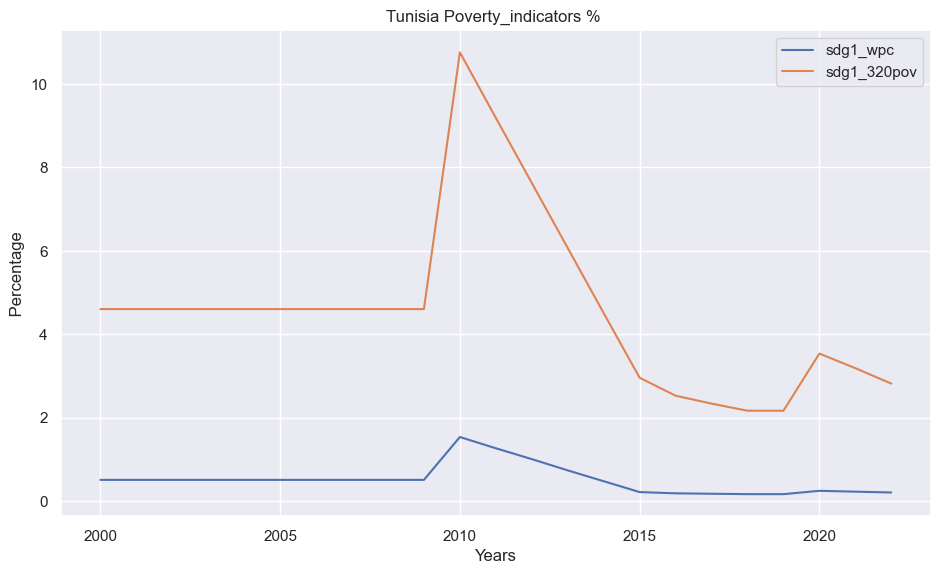

In [104]:
# Analysis : Evolution Of Poverty Indicators during 2000-2022 :
indicators= imp[['sdg1_wpc','sdg1_320pov']]
values = []
years = np.arange(2000, 2023, 1)
for year in years:
    year_data = imp[imp['Year'] == year]
    values.append([year_data[indicator].iloc[0] for indicator in indicators])

# Visualize the trends of the SDG indicators over time
fig, ax = plt.subplots(figsize=(10, 6))
for i, indicator in enumerate(indicators):
    ax.plot(years, [v[i] for v in values], label=indicator)
ax.set_xlabel('Years')
ax.set_ylabel(' Percentage ')
ax.set_title('Tunisia Poverty_indicators % ')
ax.legend()
plt.show()

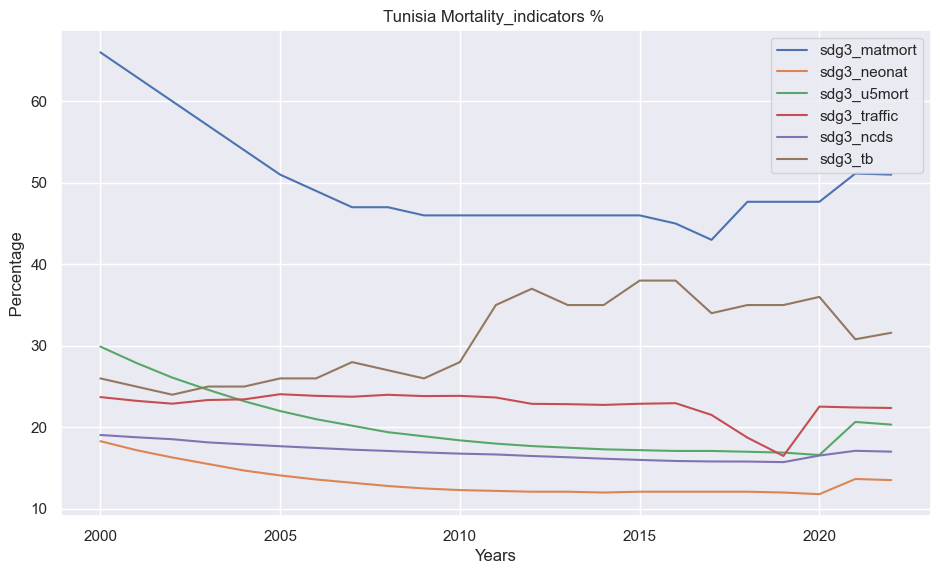

In [105]:
# Analysis : Evolution Of Motality Indicators during 2000-2022 :
indicators= imp[['sdg3_matmort','sdg3_neonat','sdg3_u5mort','sdg3_traffic','sdg3_ncds','sdg3_tb']]
values = []
years = np.arange(2000, 2023, 1)
for year in years:
    year_data = imp[imp['Year'] == year]
    values.append([year_data[indicator].iloc[0] for indicator in indicators])

# Visualize the trends of the SDG indicators over time
fig, ax = plt.subplots(figsize=(10, 6))
for i, indicator in enumerate(indicators):
    ax.plot(years, [v[i] for v in values], label=indicator)
ax.set_xlabel('Years')
ax.set_ylabel(' Percentage ')
ax.set_title('Tunisia Mortality_indicators % ')
ax.legend()
plt.show()

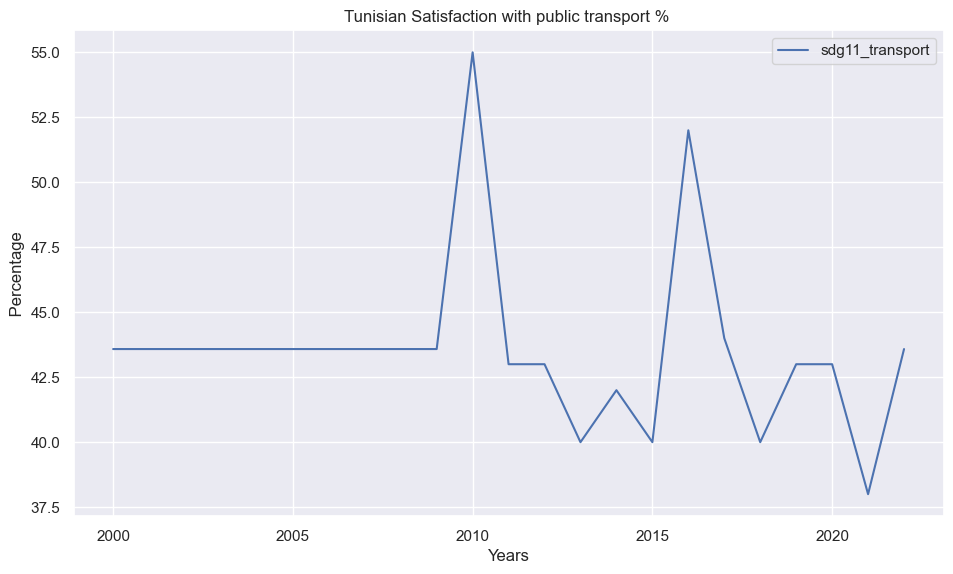

In [106]:
# Analysis : Evolution Of Tunisian Satisfaction with public transport during 2000-2022 :
indicators= imp[['sdg11_transport']]
values = []
years = np.arange(2000, 2023, 1)
for year in years:
    year_data = imp[imp['Year'] == year]
    values.append([year_data[indicator].iloc[0] for indicator in indicators])

# Visualize the trends of the SDG indicators over time
fig, ax = plt.subplots(figsize=(10, 6))
for i, indicator in enumerate(indicators):
    ax.plot(years, [v[i] for v in values], label=indicator)
ax.set_xlabel('Years')
ax.set_ylabel(' Percentage ')
ax.set_title('Tunisian Satisfaction with public transport % ')
ax.legend()
plt.show()

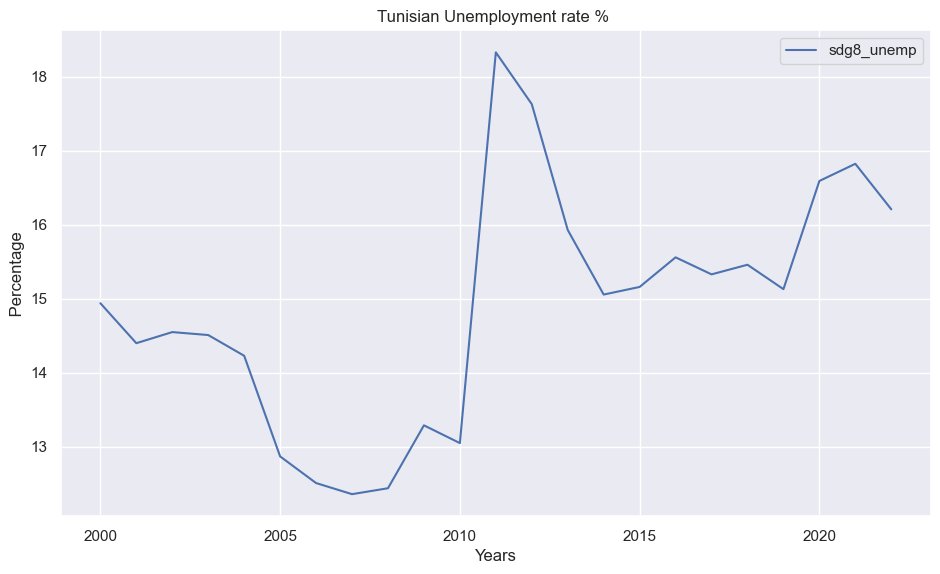

In [107]:
# Analysis : Evolution Of the Unemployment rate during 2000-2022 :
indicators= imp[['sdg8_unemp']]
values = []
years = np.arange(2000, 2023, 1)
for year in years:
    year_data = imp[imp['Year'] == year]
    values.append([year_data[indicator].iloc[0] for indicator in indicators])

# Visualize the trends of the SDG indicators over time
fig, ax = plt.subplots(figsize=(10, 6))
for i, indicator in enumerate(indicators):
    ax.plot(years, [v[i] for v in values], label=indicator)
ax.set_xlabel('Years')
ax.set_ylabel(' Percentage ')
ax.set_title('Tunisian Unemployment rate % ')
ax.legend()
plt.show()

### Linear Regression Model :

In [108]:
# split the data into training and testing sets
X_train = imp['Year'].values.reshape(-1, 1)

y_train_pop = imp['Population'].values.reshape(-1, 1)
y_train_unemp = imp['sdg8_unemp'].values.reshape(-1, 1)
y_train_trans = imp['sdg11_transport'].values.reshape(-1, 1)
y_train_gov = imp['sdg17_govex'].values.reshape(-1, 1)


# fit a linear regression model to the data

model_pop = LinearRegression().fit(X_train, y_train_pop)
model_unemp = LinearRegression().fit(X_train, y_train_unemp)
model_trans = LinearRegression().fit(X_train, y_train_trans)
model_gov = LinearRegression().fit(X_train, y_train_gov)

# make predictions for 2030
X_pred = np.array([[2030]])

y_pred_pop = model_pop.predict(X_pred)[0][0]
y_pred_unemp = model_unemp.predict(X_pred)[0][0]
y_pred_trans = model_trans.predict(X_pred)[0][0]
y_pred_gov = model_gov.predict(X_pred)[0][0]

print('Predicted value for Tunisian_Population in 2030:', y_pred_pop)
print('Predicted value for Tunisian_Unemployment rate in 2030:', y_pred_unemp)
print('Predicted value for Tunisian_Satisfaction with public transport in 2030:', y_pred_trans)
print('Predicted value for Tunisian_Government spending on health and education in 2030:', y_pred_gov)

Predicted value for Tunisian_Population in 2030: 12842374.081027657
Predicted value for Tunisian_Unemployment rate in 2030: 17.30851778656131
Predicted value for Tunisian_Satisfaction with public transport in 2030: 41.99687088274044
Predicted value for Tunisian_Government spending on health and education in 2030: 11.78521001317523


### Predicted values 2023-2030 : 

In [109]:
# Create a DataFrame with the predicted values 2023-2030 :
X_future = np.arange(2023, 2031).reshape(-1, 1)

y_pred_pop = model_pop.predict(X_future)
y_pred_unemp = model_unemp.predict(X_future)
y_pred_trans = model_trans.predict(X_future)
y_pred_gov = model_gov.predict(X_future)

# Create a DataFrame with the predicted values
df_pred_obs1 = pd.DataFrame({'Year': X_future.flatten(), 'Tunisian_Population': y_pred_pop.flatten()})
df_pred_obs2 = pd.DataFrame({'Year': X_future.flatten(), 'Tunisian_Unemployment rate': y_pred_unemp.flatten()})
df_pred_obs3 = pd.DataFrame({'Year': X_future.flatten(), 'Tunisian_Transport Satisfaction ': y_pred_trans.flatten()})
df_pred_obs4 = pd.DataFrame({'Year': X_future.flatten(), 'Money spent on health and education ': y_pred_gov.flatten()})

# Merge the DataFrames on the 'Year' column
df_pred1 = pd.merge(df_pred_obs1,df_pred_obs2,on='Year')
df_pred2 = pd.merge(df_pred_obs3,df_pred_obs4,on='Year')
df_pred3 = pd.merge(df_pred1,df_pred2,on='Year')

df_pred3

,Year,Tunisian_Population,Tunisian_Unemployment rate,Tunisian_Transport Satisfaction,Money spent on health and education
0,2023,1.208531e+07,16.415755,42.581357,11.122580
1,2024,1.219347e+07,16.543292,42.497859,11.217242
2,2025,1.230162e+07,16.670830,42.414361,11.311903
3,2026,1.240977e+07,16.798368,42.330863,11.406564
4,2027,1.251792e+07,16.925905,42.247365,11.501226
5,2028,1.262607e+07,17.053443,42.163867,11.595887
6,2029,1.273422e+07,17.180980,42.080369,11.690549
7,2030,1.284237e+07,17.308518,41.996871,11.785210


### Data Visualisation : 

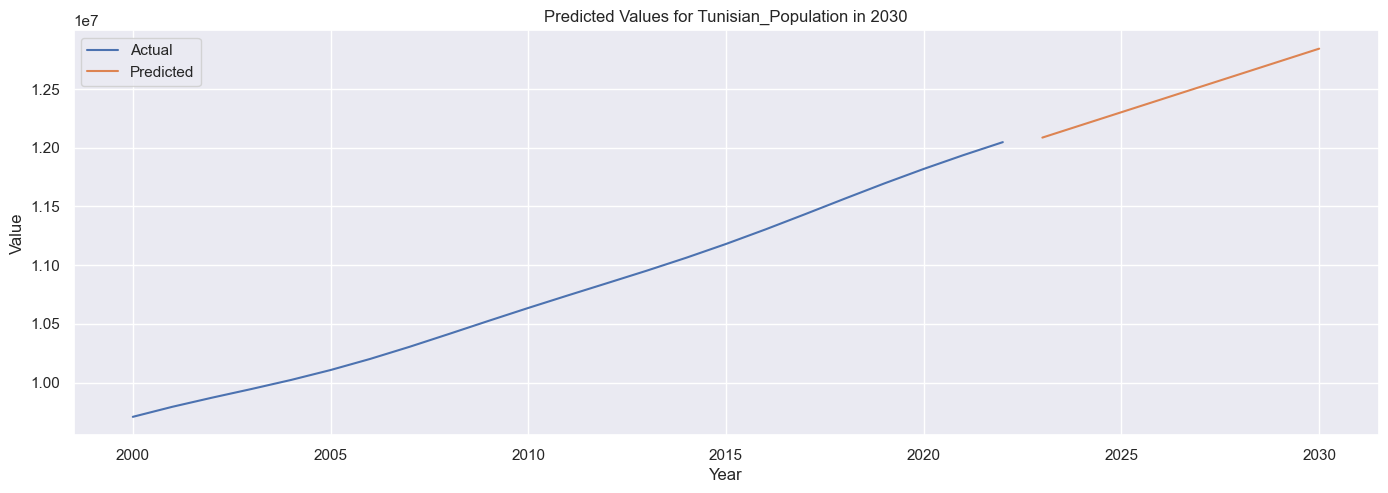

In [110]:
# Plot the predicted values for Tunisian_Population 2023-2030 :
plt.plot(imp['Year'], imp['Population'], label='Actual')
plt.plot(df_pred3['Year'], df_pred3['Tunisian_Population'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Predicted Values for Tunisian_Population in 2030')
plt.legend()
plt.show()

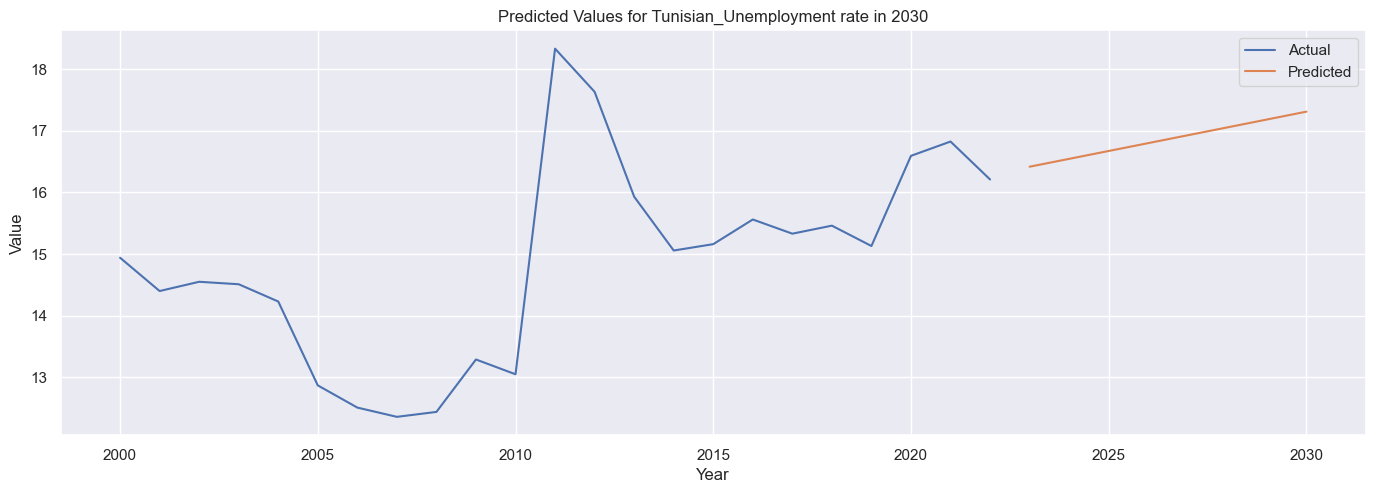

In [111]:
# Plot the predicted values for Tunisian_Unemployment rate 2023-2030 :
plt.plot(imp['Year'], imp['sdg8_unemp'], label='Actual')
plt.plot(df_pred3['Year'], df_pred3['Tunisian_Unemployment rate'], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Predicted Values for Tunisian_Unemployment rate in 2030')
plt.legend()
plt.show()

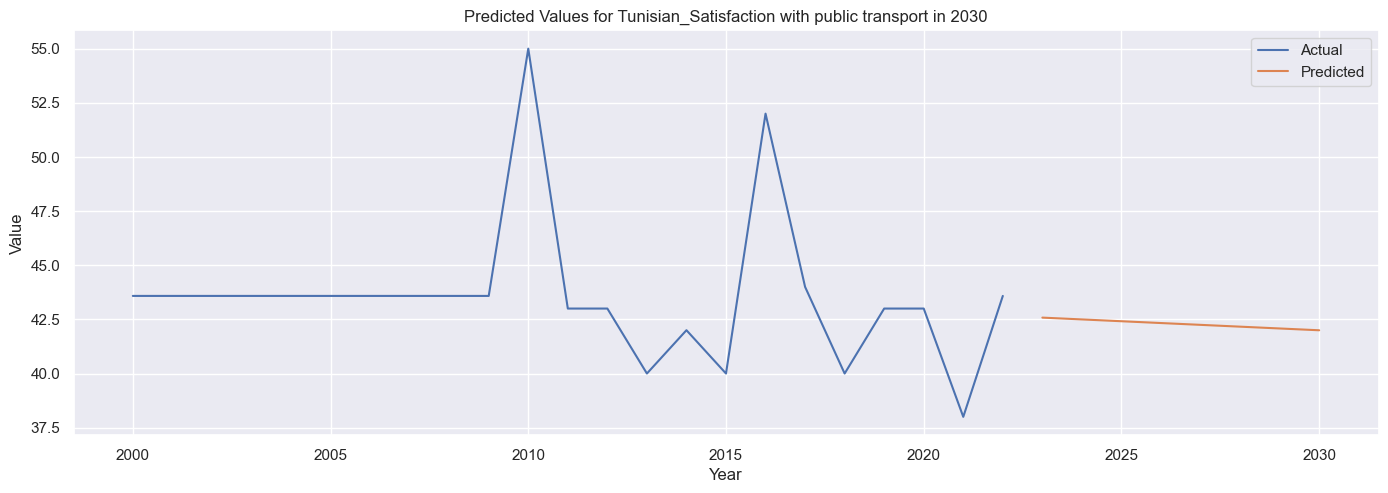

In [112]:
# Plot the predicted values for Tunisian_Transport Satisfaction 2023-2030 :
plt.plot(imp['Year'], imp['sdg11_transport'], label='Actual')
plt.plot(df_pred3['Year'], df_pred3['Tunisian_Transport Satisfaction '], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Predicted Values for Tunisian_Satisfaction with public transport in 2030')
plt.legend()
plt.show()

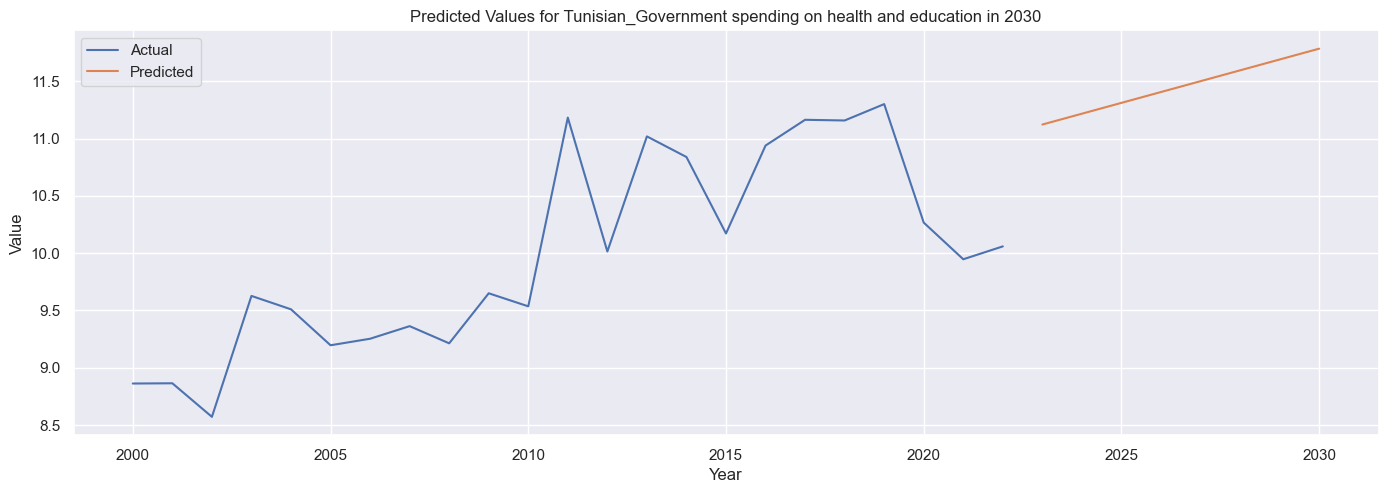

In [113]:
# Plot the predicted values for Money spent on health and education 2023-2030 :
plt.plot(imp['Year'], imp['sdg17_govex'], label='Actual')
plt.plot(df_pred3['Year'], df_pred3['Money spent on health and education '], label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Predicted Values for Tunisian_Government spending on health and education in 2030')
plt.legend()
plt.show()

## Thanks For your Time - Yahia Chammami ♥